In [28]:
!pip install scikit-surprise

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from surprise import Reader
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split # # Import Surprise package's data splitting function
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from surprise import KNNWithMeans

In [30]:

df = pd.read_csv("/content/drive/MyDrive/capgemini/electronics.csv")
df.head(30)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


In [31]:
df.tail(30)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292924,9320,1157604,5.0,2018-09-19,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292925,9320,1157605,5.0,2018-09-19,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292926,9320,1157606,5.0,2018-09-19,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292927,9320,1157607,5.0,2018-09-19,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292928,9320,1157608,5.0,2018-09-19,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292929,9320,1157609,5.0,2018-09-20,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292930,9320,1157610,5.0,2018-09-20,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292931,9320,1157611,5.0,2018-09-20,Female&Male,Computers & Accessories,ebasy,2016,NaN,0
1292932,9263,1157612,5.0,2018-09-20,Male,Camera & Photo,NaN,2016,NaN,0
1292933,9315,1157613,5.0,2018-09-20,Male,Headphones,NaN,2016,NaN,0


In [32]:
df.shape

(1292954, 10)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [34]:
df.describe()

,item_id,user_id,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00,2.012938e+03,1.747587e-01
std,2.525346e+03,3.342374e+05,1.379732e+00,2.643513e+00,5.506810e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.999000e+03,0.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00,2.012000e+03,0.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00,2.014000e+03,0.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00,2.015000e+03,0.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00,2.018000e+03,2.000000e+00


In [35]:
df.isnull().values.any()

True

In [50]:
counts=df['user_id'].value_counts()
df1=df[df['user_id'].isin(counts[counts>=5.0].index)]
df1.head(30)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
28,0,28,2.0,1999-12-01,Female,Portable Audio & Video,NaN,1999,Female,0
158,3,158,2.0,2000-08-05,Female,Camera & Photo,NaN,2005,NaN,0
183,14,158,4.0,2000-10-28,Female&Male,Camera & Photo,Kodak,2001,NaN,0
271,14,269,5.0,2001-03-02,Female&Male,Camera & Photo,Kodak,2001,Male,0
279,15,269,5.0,2001-03-10,Female&Male,Camera & Photo,Kodak,2006,Male,0
332,24,158,5.0,2001-05-04,Female,Camera & Photo,Sony,2001,NaN,0
350,16,158,3.0,2001-05-19,Female&Male,Camera & Photo,Kodak,2001,NaN,0
378,21,372,5.0,2001-06-17,Male,Computers & Accessories,NaN,2001,NaN,0
569,46,158,3.0,2001-12-10,Female&Male,Camera & Photo,Kodak,2001,NaN,0
683,40,158,4.0,2002-01-26,Female,Camera & Photo,Olympus,2002,NaN,0


In [38]:
df1.shape

(0, 10)

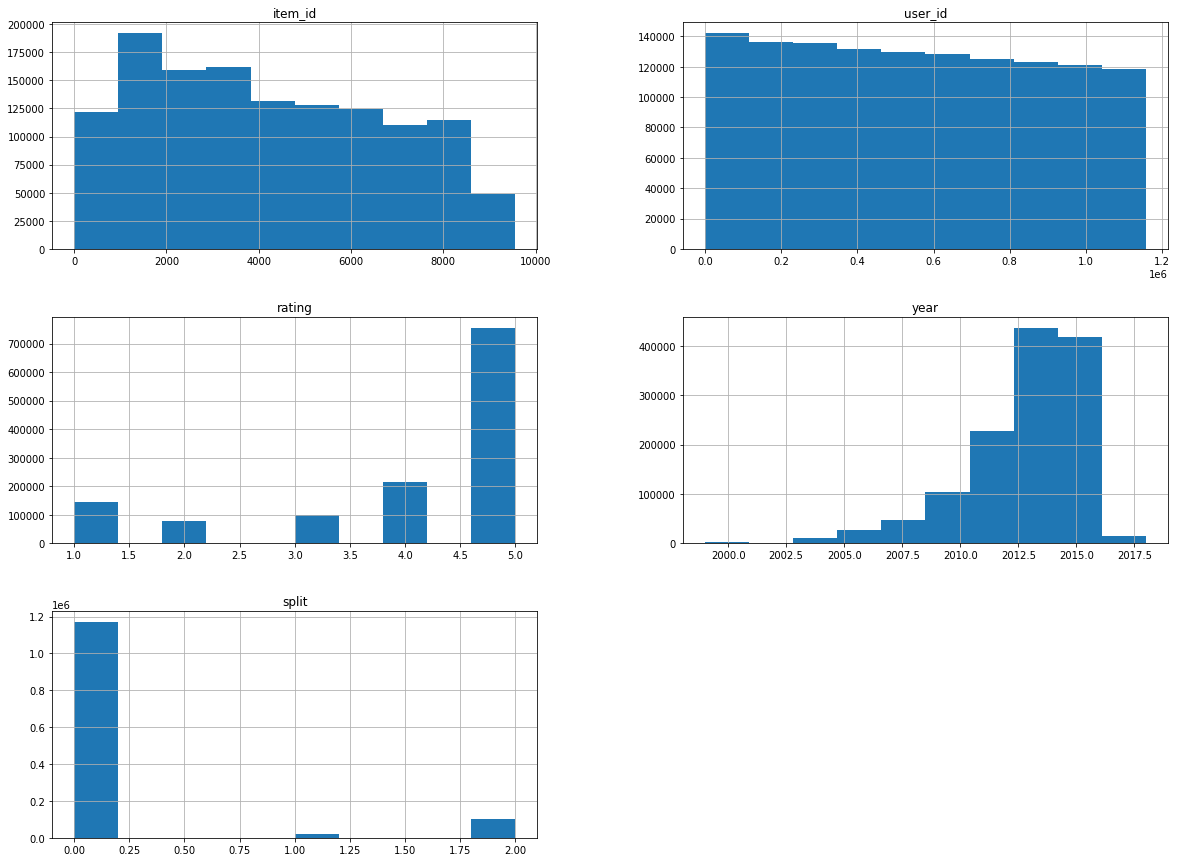

In [39]:
df.hist(figsize=(20, 15))
plt.show()

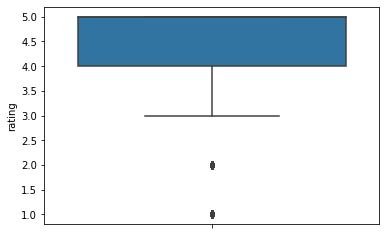

In [41]:
sns.boxplot(y='rating',data=df)

In [47]:
counts=df['user_id'].value_counts()
df1=df[df['user_id'].isin(counts[counts>=5.0].index)]
df1.head(30)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
28,0,28,2.0,1999-12-01,Female,Portable Audio & Video,NaN,1999,Female,0
158,3,158,2.0,2000-08-05,Female,Camera & Photo,NaN,2005,NaN,0
183,14,158,4.0,2000-10-28,Female&Male,Camera & Photo,Kodak,2001,NaN,0
271,14,269,5.0,2001-03-02,Female&Male,Camera & Photo,Kodak,2001,Male,0
279,15,269,5.0,2001-03-10,Female&Male,Camera & Photo,Kodak,2006,Male,0
332,24,158,5.0,2001-05-04,Female,Camera & Photo,Sony,2001,NaN,0
350,16,158,3.0,2001-05-19,Female&Male,Camera & Photo,Kodak,2001,NaN,0
378,21,372,5.0,2001-06-17,Male,Computers & Accessories,NaN,2001,NaN,0
569,46,158,3.0,2001-12-10,Female&Male,Camera & Photo,Kodak,2001,NaN,0
683,40,158,4.0,2002-01-26,Female,Camera & Photo,Olympus,2002,NaN,0


In [48]:
df1.shape

(15594, 10)

In [49]:
products_df = pd.DataFrame(df1.groupby('user_id')['rating'].mean())
products_df['product_rating_counts'] = pd.DataFrame(df1.groupby('user_id')['rating'].count())
products_df.head()

,rating,product_rating_counts
user_id,,
28,3.800000,10
158,4.000000,12
269,4.900000,10
372,5.000000,5
789,3.888889,9


In [52]:
products_df.sort_values('rating', ascending=False).head()

,rating,product_rating_counts
user_id,,
174379,5.0,5
66662,5.0,5
412076,5.0,5
411783,5.0,5
65361,5.0,5


In [53]:
products_df.sort_values('product_rating_counts', ascending=False).head()

,rating,product_rating_counts
user_id,,
142967,4.731707,41
30661,4.236842,38
89185,4.864865,37
80476,4.882353,34
46878,4.147059,34


In [54]:
users_df = pd.DataFrame(df1.groupby('user_id')['rating'].mean())
users_df['user_rating_counts'] = pd.DataFrame(df1.groupby('user_id')['rating'].count())
users_df.head()

,rating,user_rating_counts
user_id,,
28,3.800000,10
158,4.000000,12
269,4.900000,10
372,5.000000,5
789,3.888889,9


In [56]:
users_df.sort_values('rating', ascending=False).head()

,rating,user_rating_counts
user_id,,
174379,5.0,5
66662,5.0,5
412076,5.0,5
411783,5.0,5
65361,5.0,5


In [57]:
users_df.sort_values('user_rating_counts', ascending=False).head()

,rating,user_rating_counts
user_id,,
142967,4.731707,41
30661,4.236842,38
89185,4.864865,37
80476,4.882353,34
46878,4.147059,34
